In [1]:
import pandas as pd

# Load data for 02_04 analysis
df = pd.read_parquet("data_02_03.parquet")

In [2]:
# Value counts for Driving license status
license_counts = df['Driving license status'].value_counts(dropna=False)
license_proportions = df['Driving license status'].value_counts(normalize=True, dropna=False)

# Combine into a DataFrame
license_summary = pd.DataFrame({
    'Count': license_counts,
    'Proportion': license_proportions
})
print(license_summary)

                             Count  Proportion
Driving license status                        
Posiada                    6136065    0.859728
Nieokreślone (puste pole)   683774    0.095804
Nie wymagane                180907    0.025347
Nie posiada                 136471    0.019121


In [3]:
# Define translation mapping
translation = {
    "Posiada": "Holds license",
    "Nie posiada": "Does not hold",
    "Nie wymagane": "Not required",
    "Nieokreślone (puste pole)": "Undefined (empty field)"
}

# Apply translation
df['Driving license status'] = df['Driving license status'].map(translation)

In [4]:
# Filter to only drivers
drivers = df[df['Participant type'] == 'Driver']

# Value counts for driving license status among drivers
license_counts = drivers['Driving license status'].value_counts(dropna=False).to_frame(name='Count')
license_counts['Proportion'] = (license_counts['Count'] / license_counts['Count'].sum()).round(6)

print(license_counts)

                           Count  Proportion
Driving license status                      
Holds license            6136045    0.888475
Undefined (empty field)   452851    0.065571
Not required              180906    0.026194
Does not hold             136467    0.019760


In [5]:
# Filter only drivers
df_drivers = df[df['Participant type'] == 'Driver'].copy()

# Crosstab: injury severity vs driving license status
ct = pd.crosstab(df_drivers['Driving license status'], df_drivers['Injury severity'], normalize='index')

# Display full numeric values
print(ct.round(6))

Injury severity          Killed on scene  Killed within 30 days  \
Driving license status                                            
Does not hold                   0.012076               0.004235   
Holds license                   0.001347               0.000404   
Not required                    0.008883               0.006296   
Undefined (empty field)         0.000004               0.000000   

Injury severity          Seriously injured  Slightly injured  Uninjured  
Driving license status                                                   
Does not hold                     0.039292          0.054856   0.889541  
Holds license                     0.005096          0.013628   0.979525  
Not required                      0.077344          0.138221   0.769256  
Undefined (empty field)           0.000035          0.000079   0.999881  


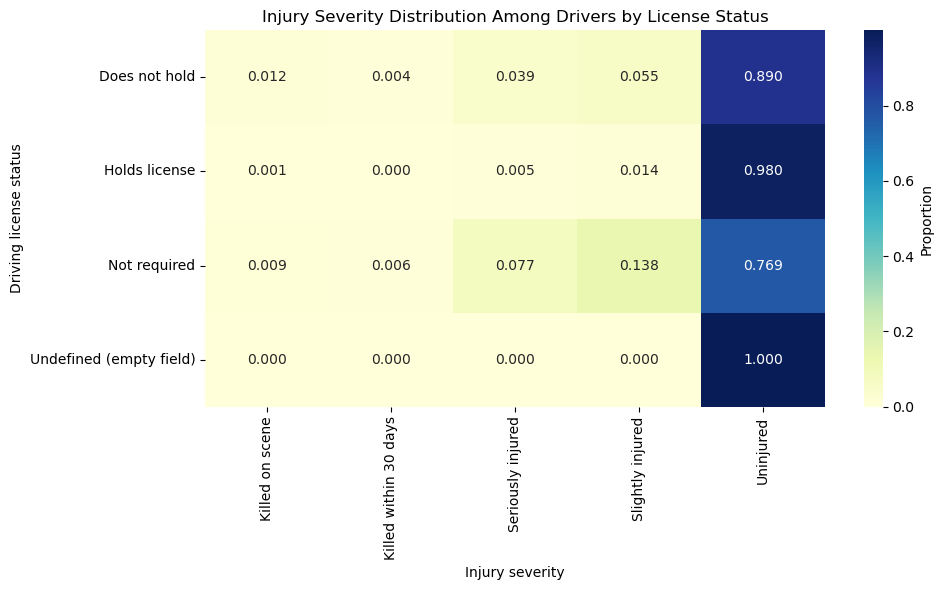

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Proportion'})

# Titles and labels
plt.title("Injury Severity Distribution Among Drivers by License Status")
plt.xlabel("Injury severity")
plt.ylabel("Driving license status")

plt.tight_layout()
plt.show()


In [14]:
df.to_parquet("data_02_04.parquet", index=False)
